## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [423]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [424]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")

In [425]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [426]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [427]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [428]:
data.isna().sum() #пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [429]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [430]:
quantitative = ['duration', 'amount', 'age']

In [431]:
binary = ['telephone', 'foreign_worker', 'credit_risk']

In [432]:
ordinal = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable']

In [433]:
categorical = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property',
               'other_installment_plans', 'housing', 'job']

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [434]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [435]:
(data[data['age'] < 30]['housing'] == 'rent').mean() *100

66.66666666666666

In [436]:
(data[data['age'] > 40]['housing'] == 'rent').mean() *100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [437]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [438]:
(data[data['foreign_worker'] == 'yes']['number_credits'] == '4-5').sum() + \
(data[data['foreign_worker'] == 'yes']['number_credits'] == '>= 6').sum()

1

### Задание 6 (1 балл)

In [439]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

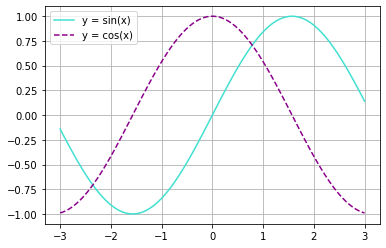

In [440]:
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), color = '#40e0d0', label = 'y = sin(x)')
ax.plot(x, np.cos(x), linestyle = '--', color = 'darkmagenta', label = 'y = cos(x)')
ax.legend()
ax.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

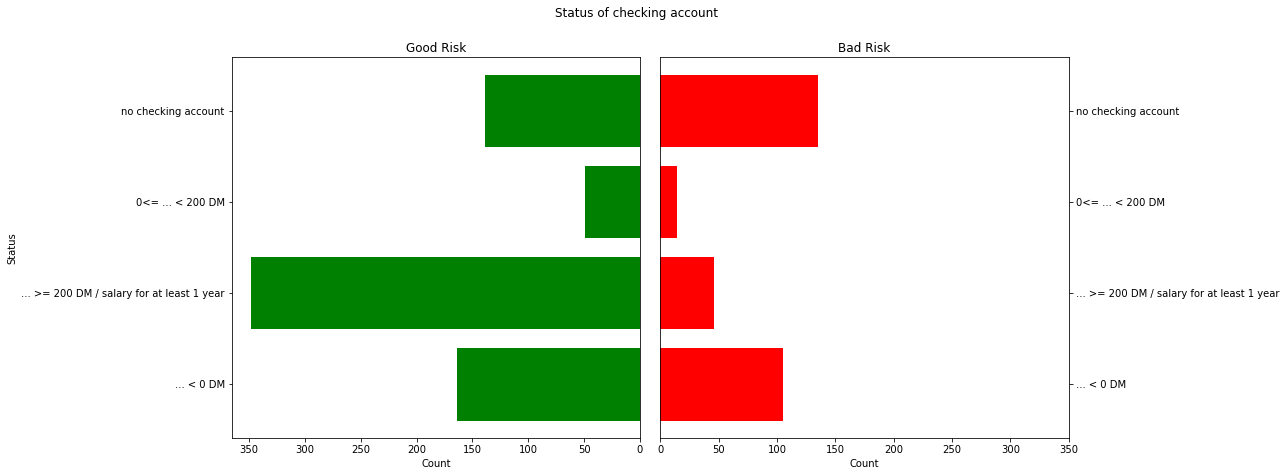

In [441]:
fig , ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_figheight(7)
fig.set_figwidth(15)
plt.suptitle('Status of checking account')

x = data.status.unique()
x.sort()
y1 = [(data.status == i)[data['credit_risk'] == 'good'].sum() for i in x]
y2 = [(data.status == i)[data['credit_risk'] == 'bad'].sum() for i in x]

ax[0].barh(x, y1, color = 'green')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Status')
ax[0].set_title('Good Risk')
ax[0].invert_xaxis()

ax[1].barh(x, y2, color = 'red')
ax[1].set_xlabel('Count')
ax[1].set_title('Bad Risk')
ax[1].yaxis.tick_right()

plt.xlim([0, 350])
plt.subplots_adjust(wspace=0.05)

plt.show()

### Задание 8  (0.5 балла)

In [442]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [443]:
g = pd.DataFrame((data.groupby(['savings', 'credit_risk']))['status'].count()).sort_values(['savings','credit_risk'], ascending=[True, False]).reset_index()
g.rename(columns={'status': 'count'}, inplace=True)
g

,savings,credit_risk,count
0,... < 100 DM,good,69
1,... < 100 DM,bad,34
2,... >= 1000 DM,good,151
3,... >= 1000 DM,bad,32
4,100 <= ... < 500 DM,good,52
5,100 <= ... < 500 DM,bad,11
6,500 <= ... < 1000 DM,good,42
7,500 <= ... < 1000 DM,bad,6
8,unknown/no savings account,good,386
9,unknown/no savings account,bad,217


In [444]:
g.savings.unique()

array(['... <  100 DM', '... >= 1000 DM', '100 <= ... <  500 DM',
       '500 <= ... < 1000 DM', 'unknown/no savings account'], dtype=object)

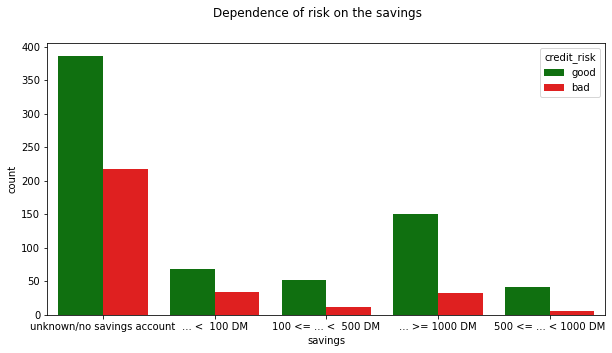

In [446]:
plt.figure(figsize=(10,5))
plt.suptitle('Dependence of risk on the savings')

palette1=('green', 'red')
sns.barplot(x='savings', y='count', hue='credit_risk', data=g, palette=palette1, order=['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '... >= 1000 DM', 
       '500 <= ... < 1000 DM'])
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

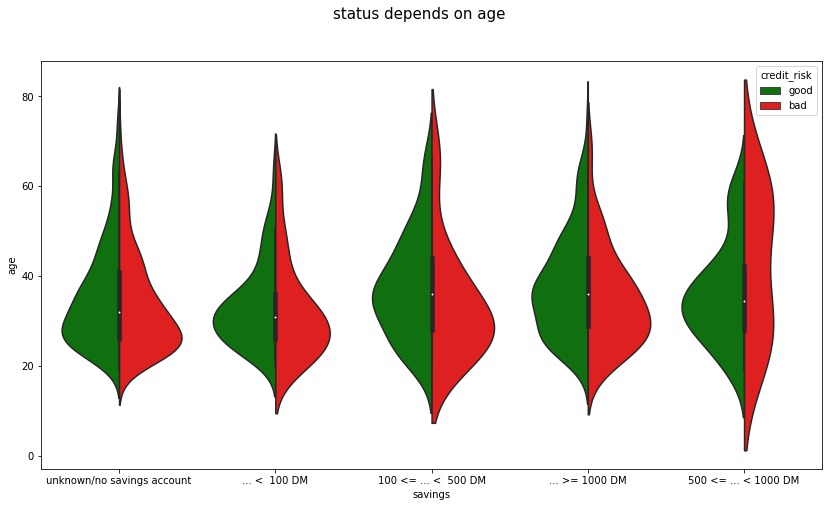

In [447]:
plt.figure(figsize=(14,7.5))
plt.suptitle('status depends on age', size=15)
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=palette1, split = True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

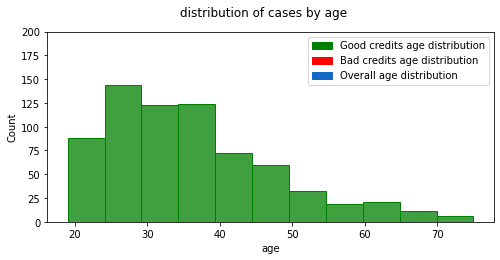

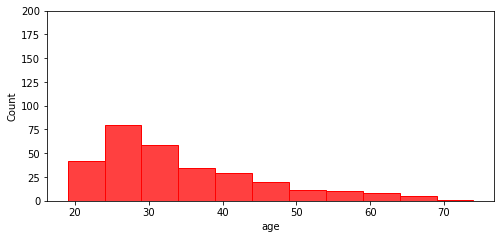

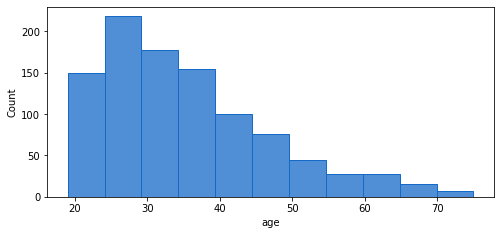

In [448]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(8, 3.5))

green_patch = mpatches.Patch(color='green', label='Good credits age distribution')
red_patch = mpatches.Patch(color='red', label='Bad credits age distribution')
blue_patch = mpatches.Patch(color='#1569C7', label='Overall age distribution')
plt.legend(handles=[green_patch, red_patch, blue_patch])


plt.suptitle('distribution of cases by age')
sns.histplot(data[data.credit_risk == 'good'].age, color='green', bins=11, edgecolor='green').set(ylim=(0, 200))
plt.show()

plt.figure(figsize=(8, 3.5))
sns.histplot(data[data.credit_risk != 'good'].age, color='red', bins=11, edgecolor='red').set(ylim=(0, 200))
plt.show()

plt.figure(figsize=(8, 3.5))
sns.histplot(data.age, color='#1569C7', bins=11, edgecolor='#1569C7')
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

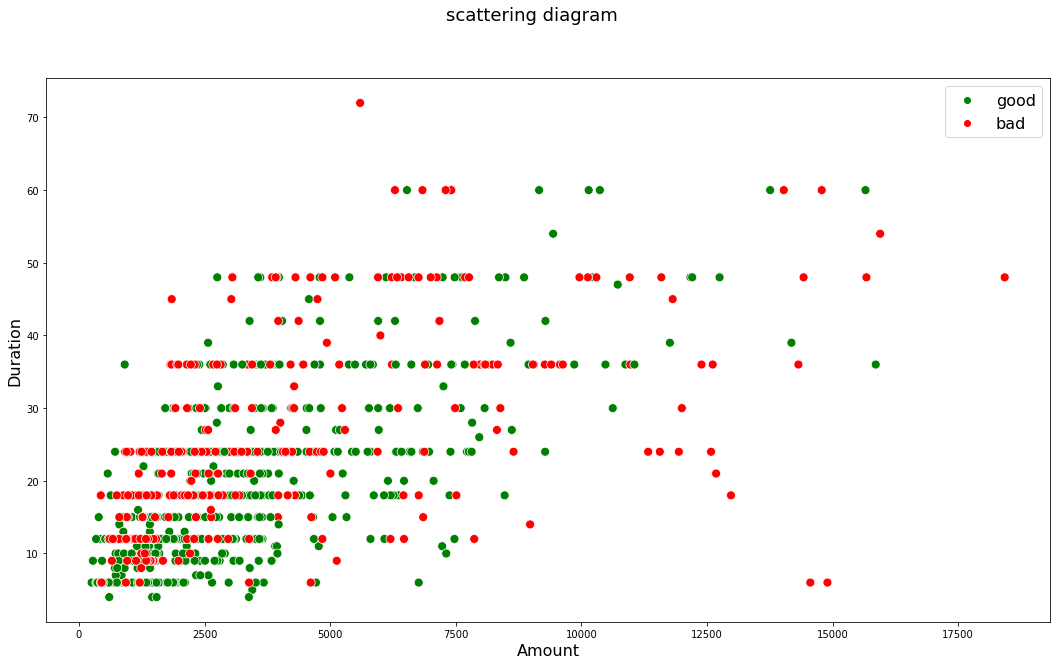

In [449]:
plt.figure(figsize=(18, 10))
plt.suptitle('scattering diagram', size=18)

sns.scatterplot(x='amount', y='duration', data=data, hue='credit_risk', palette=palette1, s=80) 

plt.xlabel('Amount', size=16)
plt.ylabel('Duration', size=16)
plt.legend(fontsize=16)

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

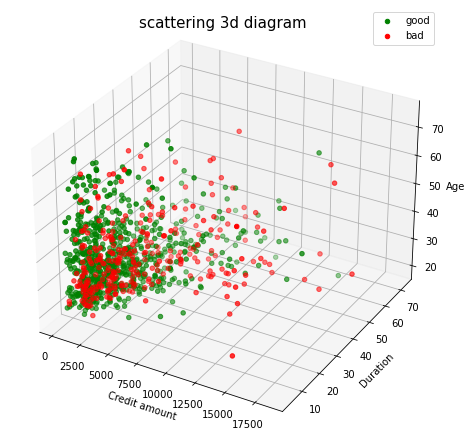

In [451]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(6,6))
plt.suptitle('scattering 3d diagram', size=15)
ax = Axes3D(fig)
 
x1 = data[data.credit_risk == 'good'].amount
y1 = data[data.credit_risk == 'good'].duration
z1 = data[data.credit_risk == 'good'].age
x2 = data[data.credit_risk == 'bad'].amount
y2 = data[data.credit_risk == 'bad'].duration
z2 = data[data.credit_risk == 'bad'].age

ax.set_xlabel("Credit amount") 
ax.set_ylabel("Duration") 
ax.set_zlabel("Age") 

p1 = ax.scatter(x1, y1, z1, c='green', label = 'good')
p2 = ax.scatter(x2, y2, z2, c='red', label = 'bad')

ax.legend(handles=[p1, p2])

plt.show() 

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [452]:
NumericData = data.select_dtypes(exclude='number').apply(lambda x: pd.factorize(x)[0])

NumericData.insert(1, 'duration', data.duration, True)
NumericData.insert(5, 'amount', data.amount, True)
NumericData.insert(11, 'age', data.age, True)

NumericData

,status,duration,credit_history,purpose,savings,amount,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,0,0,0,1049,0,0,0,0,...,21,0,0,0,0,0,0,0,0,0
1,0,9,0,1,0,2799,1,1,1,0,...,36,1,0,0,1,0,1,0,0,0
2,1,12,1,2,1,841,2,1,0,0,...,23,1,0,0,0,1,0,0,0,0
3,0,12,0,1,0,2122,1,2,1,0,...,39,1,0,0,1,1,1,0,1,0
4,0,12,0,1,0,2171,1,0,1,0,...,38,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1,3,0,1987,1,1,1,0,...,21,1,0,0,0,1,1,0,0,1
996,0,24,1,1,0,2303,4,0,1,2,...,45,1,0,1,0,0,0,0,0,1
997,2,21,0,1,3,12680,4,0,1,0,...,30,3,0,2,0,3,0,1,0,1
998,1,12,1,3,3,6468,3,1,1,0,...,52,3,0,1,0,3,0,1,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [453]:
NumericData['age'] = pd.cut(NumericData['age'].astype(int), 5)
NumericData['duration'] = pd.cut(NumericData['duration'].astype(int), 5)
NumericData['amount'] = pd.cut(NumericData['amount'].astype(int), 5)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

NumericData['age'] = label.fit_transform(NumericData['age'])
NumericData['duration'] = label.fit_transform(NumericData['duration'])
NumericData['amount'] = label.fit_transform(NumericData['amount'])

NumericData

,status,duration,credit_history,purpose,savings,amount,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,1,0,...,1,1,0,0,1,0,1,0,0,0
2,1,0,1,2,1,0,2,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,1,2,1,0,...,1,1,0,0,1,1,1,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,3,0,0,1,1,1,0,...,0,1,0,0,0,1,1,0,0,1
996,0,1,1,1,0,0,4,0,1,2,...,2,1,0,1,0,0,0,0,0,1
997,2,1,0,1,3,3,4,0,1,0,...,0,3,0,2,0,3,0,1,0,1
998,1,0,1,3,3,1,3,1,1,0,...,2,3,0,1,0,3,0,1,0,1


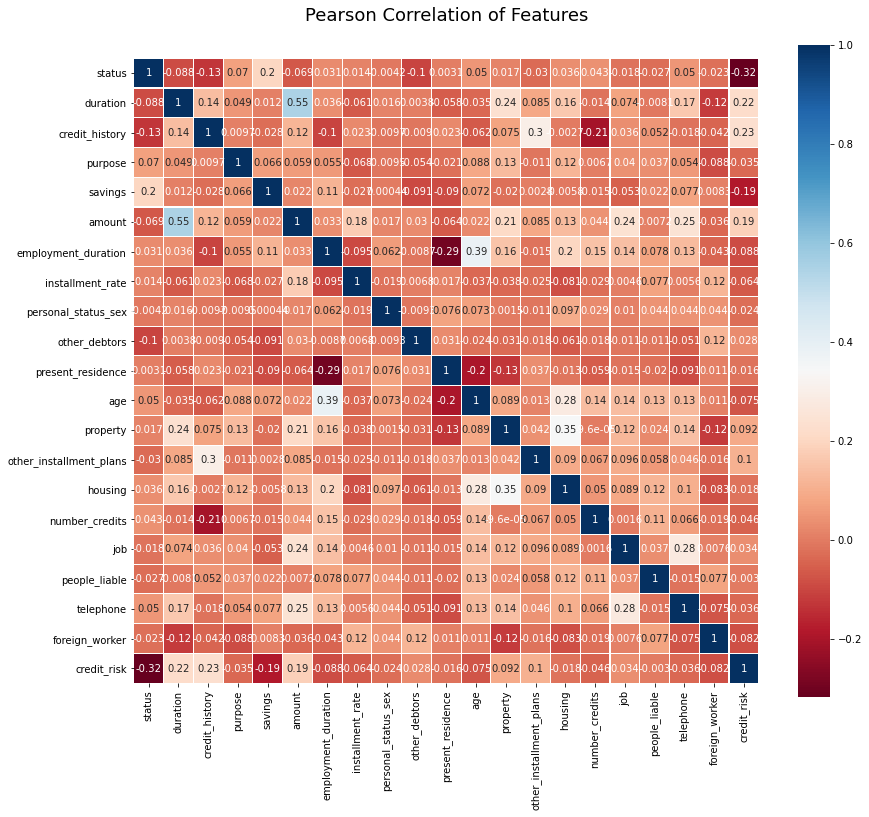

In [454]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


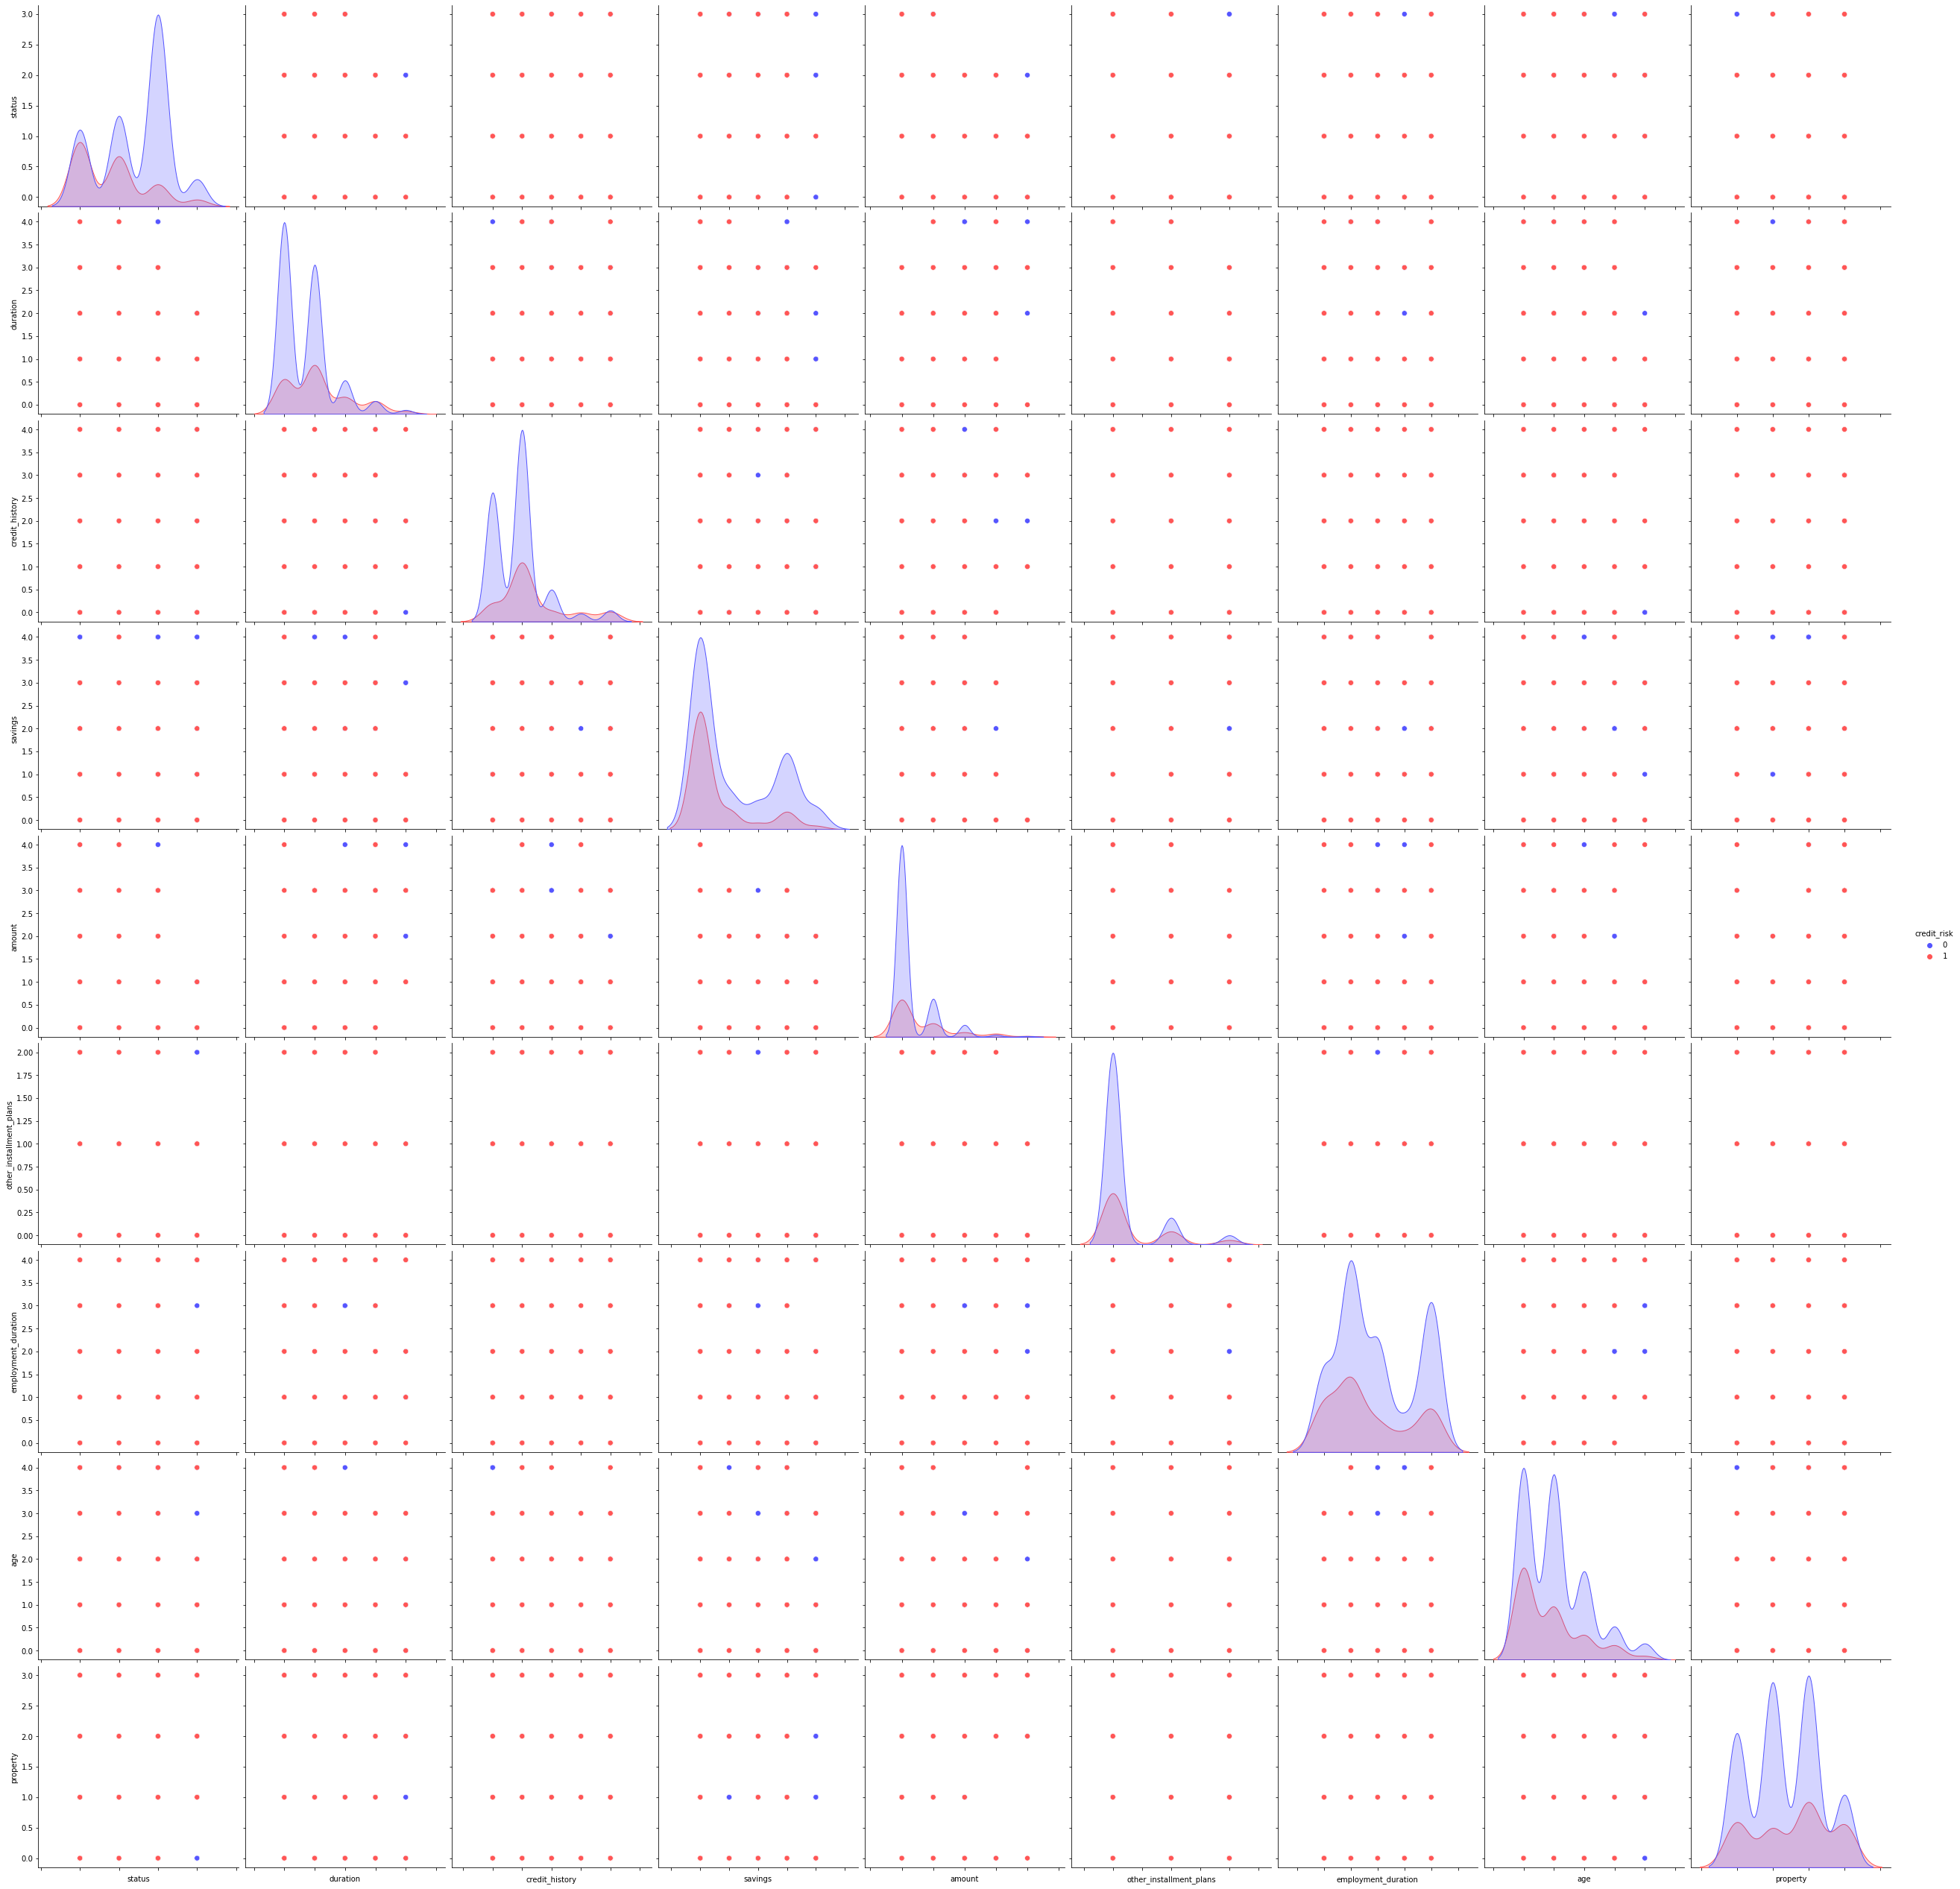

In [455]:
g = sns.pairplot(NumericData[[u'credit_risk', u'status', u'duration', u'credit_history', u'savings', u'amount',
                              u'other_installment_plans', u'employment_duration', u'age', u'property']], \
                 hue='credit_risk', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

In [484]:
def predict(x):
    if x['duration'] == 0 and x['status'] in (2,3) and x['other_installment_plans'] == 1:
        return 0
    else:
        if x['credit_history'] > 2 and x['status'] < 2 or x['amount'] > 2:
            return 1
        if x['employment_duration'] == 4 and x['age'] == 4:
            return 1
        if x['employment_duration'] == 3 and x['age'] == 2:
            return 1
    return 0

from sklearn.metrics import accuracy_score

pred = NumericData.apply(lambda x: predict(x), axis=1)
accuracy_score(NumericData['credit_risk'], pred)

0.734